<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/my-keras/recurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 文字資料處理

若要使用中文，建議先斷詞

### one-hot encoding (簡易版)

In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']  # 初始資料：每一個樣本是一個輸入項目(在這範例中，樣本是一個句子，但也可以是整個文件)

token_index = {}  # 建立資料中所有 tokens 的索引
for sample in samples:
    for word in sample.split():  # 透過 split()方法對樣本進行分詞。在真實案例中，還要移除樣本中的標點符號與特殊字元
        if word not in token_index:
            token_index[word] = len(token_index) + 1  # 為每個文字指定一個唯一索引。請注意，不要把索引 0 指定給任何文字

max_length = 10  # 將樣本向量化。每次只專注處理每個樣本中的第一個 max_length 文字

results = np.zeros(shape=(len(samples),  # 用來儲存結果的 Numpy array
                          max_length,
                          max(token_index.values()) + 1))  
print(results.shape) # shape=(2, 10, 11), 共 2 個樣本, 每個樣本只看前 10 個文字, 總樣本共有 10 個 token, 索引號到 11, 因為 0 不用。
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
print(token_index)
print(results)

(2, 10, 11)
{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


### one-hot encoding on characters (簡易版)

In [ ]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 所有可印出的 ASCII 字元的字串, '0123456789abc....'
print(len(characters))

token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
print(results.shape) 

for i, sample in enumerate(samples):
	for j, character in enumerate(sample):
		index = token_index.get(character)
		results[i, j, index] = 1.
print(results[0][0])

100
(2, 50, 101)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


### 用 Keras 做文字的 one-hot encoding

In [ ]:
from keras.preprocessing.text import Tokenizer  # 匯入 Keras 分詞器

samples = ['The cat sat on the mat.', 'The dog ate my homework.']  # 初始資料

tokenizer = Tokenizer(num_words=1000) # 1. 建立一個分詞器, 設定上僅考慮 1, 000 個最常用的文字 (token), 也就是只會看初始資料的前 1000 個文字
tokenizer.fit_on_texts(samples)  # 建立文字對應的索引值, 一樣依出現順序來決定, 0 一樣不使用

sequences = tokenizer.texts_to_sequences(samples)  # 將初始資料中的文字轉換成對應的索引值 list
print(sequences) # [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')  # 可以直接取得 one-hot 的二進位表示方式。tokenizer 支援除了 one-hot 編碼以外, 也有支援其他的向量化方法(mode='count')
print(one_hot_results.shape) # (2, 1000) 共 2 個樣本, 每個樣本中的文字對應到的 token 位置 (1000個)
word_index = tokenizer.word_index  # 計算完成後, 取得文字與索引間的對應關聯 
print(word_index) # {'the': 1, 'cat': 2, 'sat': 3, ... 'my': 8, 'homework': 9}
print('找到 %s 個唯一的 tokens.' % len(word_index)) 


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
(2, 1000)
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
找到 9 個唯一的 tokens.


### 使用雜湊技巧的單字 one-hot encoding (簡易版本)


In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000 #  將文字儲存成大小為 1, 000 的向量。如果有接近 1, 000 個文字(或更多), 將會造成許多雜湊碰撞, 這會降低此編碼方法的準確性
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
	for j, word in list(enumerate(sample.split()))[:max_length]:
		index = abs(hash(word)) % dimensionality # ← 將文字雜湊成 0 到 1, 000 之間的隨機整數索引
		results[i, j, index] = 1.
print(results.shape)

(2, 10, 1000)


### 使用嵌入向量層學習文字嵌入向量

### 建立一個嵌入層 (Embedding Layer)

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)  # 建立嵌入向量層至少須指定兩個參數：可能的 tokens 數量 (此處為 1, 000, 最少是 1+最大文字索引) 和嵌入向量的維數 (此處為 64)

### 載入 IMDB, 整理成適合供 Embedding 層使用的資料


In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000  # ←設定作為特徵的文字數量
maxlen = 20 # ←在 20 個文字之後切掉文字資料 (在 max_features 最常見的文字中)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)  # ←將資料以整數 lists 載入
print(len(x_train), len(x_train[0]), len(x_train[1]))
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)  # ←將整數 lists 轉換為 2D 整數張量, 形狀為(樣本數 samples, 最大長度 maxlen)
print(x_train.shape)
print(x_train[0])
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


17465344/17464789 [==============================] - 0s 0us/step
25000 218 189
(25000, 20)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


### 把 IMDB 資料提供給 Embedding layer和分類器

In [ ]:
# 1. 指定嵌入向量層的最大輸入長度, 以便之後可以攤平嵌入向量的輸入。在嵌入向量層之後, 啟動函數輸出的 shape 為 (樣本數 samples, 最大長度 maxlen, 8）
# 2. 將嵌入向量的 3D 張量展平為 2D 張量, 形狀為(樣本數 samples, 最大長度 maxlen * 8)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # ←1...

model.add(Flatten()) # ← 2...

model.add(Dense(1, activation='sigmoid')) # ← 在頂部加上分類器
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, 
                    y_train,epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 207us/step - loss: 0.6598 - acc: 0.6403 - val_loss: 0.5995 - val_acc: 0.7088
Epoch 2/10
20000/20000 [==============================] - 2s 118us/step - loss: 0.5252 - acc: 0.7577 - val_loss: 0.5171 - val_acc: 0.7342
Epoch 3/10
20000/20000 [==============================] - 2s 117us/step - loss: 0.4548 - acc: 0.7890 - val_loss: 0.4975 - val_acc: 0.7480
Epoch 4/10
20000/20000 [==============================] - 2s 119us/step - loss: 0.4206 - acc: 0.8089 - val_loss: 0.4920 - val_acc: 0.7550
Epoch 5/10
20000/20000 [==============================] - 2s 116us/step - loss: 0.3970 - acc: 0.8208 - val_loss: 0.4935 - val_acc: 0.7560
Epoch 6/10
20000/20000 [==============================] - 2s 114us/step - loss: 0.3783 - acc: 0.8321 - val_loss: 0.4969 - val_acc: 0.7576
Epoch 7/10
20000/20000 [==============================] - 2s 118us/step - loss: 0.3609 - acc: 0.8429 - val_loss: 0.5007 - v

### 使用預先訓練的文字嵌入向量

### 處理原始 IMDB 資料的標籤 (skip)

In [ ]:
import os

imdb_dir = r'C:\Users\Admin\Desktop\Google\Python Keras\ch06\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)



In [ ]:
print(len(texts))

### 對原始 IMDB 資料的文字資料進行向量化 (skip)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100 個文字後切斷評論 (只看評論的前 100 個字)
training_samples = 200  # 以 200 個樣本進行訓練
validation_samples = 10000 # 以 10, 000 個樣本進行驗證
max_words = 10000  # 僅考慮資料集中的前 10, 000 個單詞

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # 將文字轉成整數 list 的序列資料

word_index = tokenizer.word_index
print(word_index[: 10])
print('共使用了 %s 個 token 字詞.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) # 只取每個評論的前 100 個字 (多切少補) 作為資料張量
labels = np.asarray(labels)  # 將標籤 list 轉為 Numpy array (標籤張量)

print('資料張量 shape:', data.shape) # (25000, 100)
print('標籤張量 shape:', labels.shape) # (25000,)

indices = np.arange(data.shape[0])  # 將資料拆分為訓練集和驗證集, 但首先要將資料打散, 因為所處理的資料是有順序性的樣本資料 (負評在前, 然後才是正評)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_words = 10000  # ←設定作為特徵的文字數量
maxlen = 100

word_index = imdb.get_word_index()

(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_words)  # ←將資料以整數 lists 載入
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)  # ←將整數 lists 轉換為 2D 整數張量, 形狀為(樣本數 samples, 最大長度 maxlen)
x_val = preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

x_train.shape

1646592/1641221 [==============================] - 0s 0us/step


(25000, 100)

### 解析 GloVe 文字嵌入向量檔案

In [ ]:
!cd drive/"My Drive" && wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-08-01 12:29:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-08-01 12:29:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-08-01 12:29:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!cd drive/"My Drive" && unzip glove.6B.zip && rm -f glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
import os
glove_dir = './drive/My Drive'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('共有 %s 個文字嵌入向量' % len(embeddings_index))


共有 400000 個文字嵌入向量


### 準備 GloVe 文字嵌入向量矩陣

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # ←嵌入向量索引中找不到的文字將為 0

### 模型定義

In [ ]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# 參數 樣本數, 嵌入向量維度, 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # should specify input length if you want to add flatten layer next
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


###  將預訓練的文字嵌入向量載入到嵌入向量層中

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

### 訓練和驗證

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 177us/step - loss: 0.6394 - acc: 0.6889 - val_loss: 0.7704 - val_acc: 0.5646
Epoch 2/20
25000/25000 [==============================] - 4s 172us/step - loss: 0.6097 - acc: 0.7133 - val_loss: 0.7685 - val_acc: 0.5833
Epoch 3/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.6063 - acc: 0.7125 - val_loss: 0.7779 - val_acc: 0.5797
Epoch 4/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.5997 - acc: 0.7208 - val_loss: 0.8527 - val_acc: 0.5650
Epoch 5/20
25000/25000 [==============================] - 4s 175us/step - loss: 0.5964 - acc: 0.7247 - val_loss: 0.9644 - val_acc: 0.5478
Epoch 6/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.5978 - acc: 0.7270 - val_loss: 0.8755 - val_acc: 0.5640
Epoch 7/20
25000/25000 [==============================] - 4s 174us/step - loss: 0.5934 - acc: 0.7290 - val_loss: 0.8135 - 

### 繪製結果

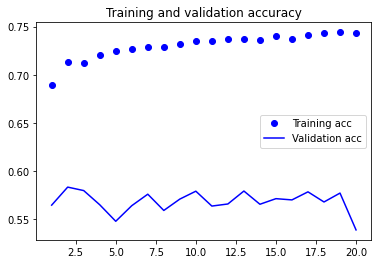

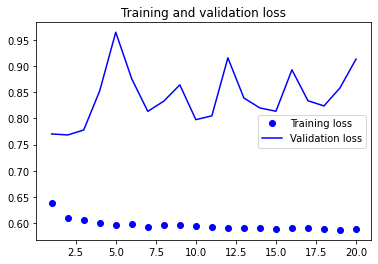

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### 訓練相同模型而不使用預先訓練的文字嵌入向量

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 192us/step - loss: 0.4176 - acc: 0.8010 - val_loss: 0.3589 - val_acc: 0.8402
Epoch 2/10
25000/25000 [==============================] - 5s 187us/step - loss: 0.1517 - acc: 0.9439 - val_loss: 0.4348 - val_acc: 0.8316
Epoch 3/10
25000/25000 [==============================] - 4s 179us/step - loss: 0.0202 - acc: 0.9940 - val_loss: 0.6959 - val_acc: 0.8158
Epoch 4/10
25000/25000 [==============================] - 5s 182us/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.9649 - val_acc: 0.8177
Epoch 5/10
25000/25000 [==============================] - 4s 179us/step - loss: 1.4654e-04 - acc: 0.9999 - val_loss: 1.2027 - val_acc: 0.8193
Epoch 6/10
25000/25000 [==============================] - 5s 183us/step - loss: 2.4264e-06 - acc: 1.0000 - val_loss: 1.3641 - val_acc: 0.8214
Epoch 7/10
25000/25000 [==============================] - 5s 181us/step - loss: 5.5256e-09 - acc: 1.0000 - val_los

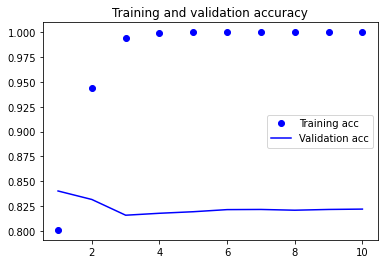

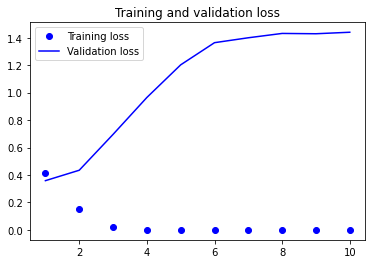

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


############### 繪製
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 對測試資料進行分詞 (skip)

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
	dir_name = os.path.join(test_dir, label_type)
	for fname in sorted(os.listdir(dir_name)):
		if fname[-4:] == '.txt':
			f = open(os.path.join(dir_name, fname), encoding='UTF-8')
			texts.append(f.read())
			f.close()
			if label_type == 'neg':
				labels.append(0)
			else:
				labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

# 了解遞歸神經網路

### 以 Numpy 實現簡單的 RNN

In [ ]:
import numpy as np

timesteps = 100   # 輸入序列資料中的時間點數量
input_features = 32  # 輸入特徵空間的維度數
output_features = 64  # 輸出特徵空間的維度數

inputs = np.random.random((timesteps, input_features))  # 輸入資料：隨機產生數值以便示範

state_t = np.zeros((output_features, ))  # 初始狀態：全零向量

W = np.random.random((output_features, input_features))  # 建立隨機權重矩陣
U = np.random.random((output_features, output_features)) # 建立隨機權重矩陣
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:  #  input_t 是個向量, shape 為 (input_features, )
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)  # 結合輸入與當前狀態(前一個輸出)以取得當前輸出
    successive_outputs.append(output_t)  # 將此輸出儲存在列表中
    state_t = output_t  #更新下一個時間點的網絡狀態

np.array(successive_outputs).shape


(100, 64)

### 準備 IMDB 資料

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  #考慮做為特徵的文字數量
maxlen = 500  # 我們只看每篇評論的前 500 個文字

batch_size = 32

print('讀取資料...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences') # 25000 筆訓練用序列資料 (評論)
print(len(input_test), 'test sequences')	# 25000 筆測試用序列資料

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) # 1. 只看每篇評論的前 500 個文字, 多的去除, 不足填補
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)	# shape=(25000, 500)
print('input_test shape:', input_test.shape)	# shape=(25000, 500)



讀取資料...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### 以嵌入向量 Embedding 層和 SimpleRNN 層訓練模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))

# middle RNN layer needs full data
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))
# model.add(SimpleRNN(32, return_sequences=True))

model.add(SimpleRNN(32)) # by default, return_sequences=False
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.6029 - acc: 0.6605 - val_loss: 0.9675 - val_acc: 0.5150
Epoch 2/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3862 - acc: 0.8401 - val_loss: 0.3776 - val_acc: 0.8420
Epoch 3/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2826 - acc: 0.8885 - val_loss: 0.3478 - val_acc: 0.8566
Epoch 4/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2321 - acc: 0.9132 - val_loss: 0.4408 - val_acc: 0.8472
Epoch 5/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1823 - acc: 0.9331 - val_loss: 0.5125 - val_acc: 0.8278
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1469 - acc: 0.9481 - val_loss: 0.3816 - val_acc: 0.8608
Epoch 7/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.1003 - acc: 0.9671 - val_loss: 0.4239 - val_acc:

### 繪製結果

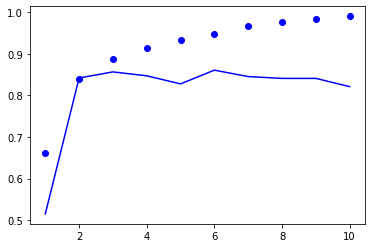

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

Reasons of bad performance (only 85%):

1. Simple RNN is not good at handling long sequences, such as texts. (too long to momorize!)

2. We only use first 500 words as our training data

### 在 Keras 中使用 LSTM 層

LSTM 新增了一個額外的資訊流，它可以跨時間點傳遞資訊，在不同時間點 t 取用 C_t (C: carry)

Each LSTM unit has three transitions (i, f, k), each has its own weight matrices U and W

- output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
    - Vo is the hidden layer
- c_t+1 = i_t * k_t + c_t * f_t
    - i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
    - f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
    - k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.4965 - acc: 0.7674 - val_loss: 0.3426 - val_acc: 0.8572
Epoch 2/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.2934 - acc: 0.8873 - val_loss: 0.3012 - val_acc: 0.8768
Epoch 3/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.2358 - acc: 0.9104 - val_loss: 0.3056 - val_acc: 0.8876
Epoch 4/10
20000/20000 [==============================] - 209s 10ms/step - loss: 0.2033 - acc: 0.9254 - val_loss: 0.4010 - val_acc: 0.8382
Epoch 5/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.1791 - acc: 0.9337 - val_loss: 0.3083 - val_acc: 0.8812
Epoch 6/10
20000/20000 [==============================] - 210s 10ms/step - loss: 0.1593 - acc: 0.9436 - val_loss: 0.3727 - val_acc: 0.8716
Epoch 7/10
20000/20000 [==============================] - 210s 11ms/step - loss: 0.1460 - acc: 0.9488 - val_loss: 0.3

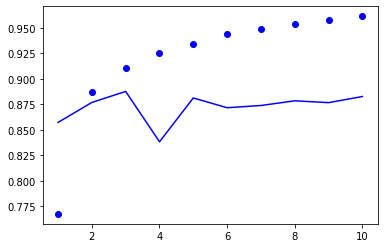

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32)) # by default, activation='tanh'
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

分析評論的全域或長型結構 (LSTM 的擅長之處) 對情感分析沒有幫助。這個問題需要透過查看每個評論中出現的文字以及頻率來處理，這也是全連接層在做的事。

在自動問答與機器翻譯上，LSTM 的強處就會被凸顯。

# 遞歸神經網路的進階使用方法

### 檢視耶拿天氣資料集的資料

In [ ]:
!mkdir ./drive/"My Drive"/jena_climate

In [ ]:
!cd ./drive/"My Drive"/jena_climate && wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2020-08-01 15:33:12--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.39.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.39.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  42.1MB/s    in 0.3s    

2020-08-01 15:33:13 (42.1 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [ ]:
!cd ./drive/"My Drive"/jena_climate && unzip jena_climate_2009_2016.csv.zip && rm -f jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [41]:
import os

data_dir = './drive/My Drive/jena_climate'  # 您的 jena_climate 資料夾路徑
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv') # 資料集完整路徑

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)  # 
print(len(header))
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
15
420551


### 解析資料

In [42]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
print(float_data.shape)   # 共有 420551 個時間點的天氣資料, 每個包含 14 種天氣數值

(420551, 14)


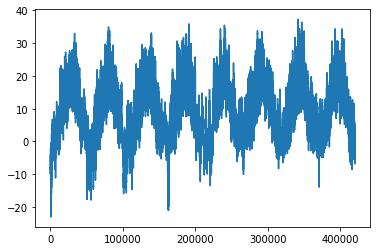

In [ ]:
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 索引 1 為 temperature 資料
plt.plot(range(len(temp)), temp)
plt.show()

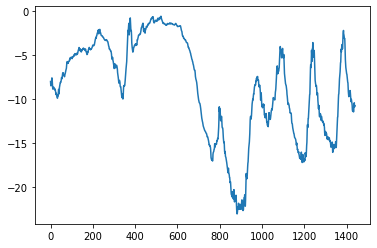

In [ ]:
# first 10 days (record every 10 minutes)
plt.plot(range(1440), temp[:1440])
plt.show()

### 標準化資料

In [43]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

print(std)

[ 8.48043388  8.85249908  8.95324185  7.16584991 16.72731652  7.68914559
  4.19808168  4.84034436  2.66564926  4.25206364 42.48884277  1.53666449
  2.33067298 86.61322998]


### 定義產生器函式以產生時間序列樣本資料及其目標資料

Goal:
Learn from pass `loopback` points, sample every `steps`, and try to predict next `delay` points. 

- `steps` = 6: sampling every hour
- `delay` = 144: goal is to predict the temperature after 24 hours

In [44]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
        
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                        lookback // step,
                        data.shape[-1]))
        targets = np.zeros((len(rows), ))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

### 建立訓練資料、驗證資料和測試資料產生器

In [45]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

# 訓練資料產生器
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
# 驗證資料產生器
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
# 測試資料產生器
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size  #← 1...
test_steps = (len(float_data) - 300001 - lookback) // batch_size  #←2..

#1. val_gen 產生器需要運行多少次才可以產生完整的驗證集
#2. test_gen 產生器需要運行多少次才可以產生完整的測試集

print(val_steps, test_steps)

769 930


### 計算一般常識性基準方法 MAE (24hr後的溫度等於當前溫度)

In [26]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):   # ← 計算所有的驗證集資料
        samples, targets = next(val_gen) # ← 驅動產生器
        # print(samples.shape) # shape=(128, 240, 14), 因為回朔為 1440 個時間點, 並以 6 個時間點為間隔進行取樣,所以共產生 1440/6=240 個時間點資料
        # print(targets.shape)  # shape=(128,) 128 筆溫度答案 
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes) * std[1])  #　0.29 -> 2.56488743498

evaluate_naive_method()

2.564887434980494


### 訓練和評估密集連接模型

In [27]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 12s 24ms/step - loss: 1.4949 - val_loss: 0.9015
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.4481 - val_loss: 0.2563
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2881 - val_loss: 0.2914
Epoch 4/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2647 - val_loss: 0.2597
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2513 - val_loss: 0.2123
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2430 - val_loss: 0.2059
Epoch 7/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2346 - val_loss: 0.2311
Epoch 8/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2289 - val_loss: 0.2746
Epoch 9/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2238 - val_loss: 0.2168
Epoch 10/20
500/500 [==============================] - 11s 23ms/step - loss: 0.222

### 繪製結果

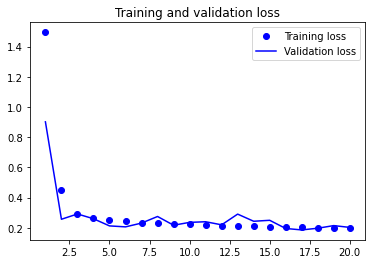

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 訓練和驗證 GRU 模型

GRU 做了簡化，使得執行成本較 LSTM 低，但模型表示能力較差 (tradeoff)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


### 訓練和驗證使用丟棄法常規化的 GRU 模型

recurrent_dropout: same dropout mask across all time points.

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.01,
                     input_shape=(None, float_data.shape[-1])))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


### 訓練和驗證一個使用丟棄法的堆疊 GRU 模型 (增加容量)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     #recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))

model.add(layers.GRU(64, activation='relu', # by default, activation='tanh'
                     #recurrent_dropout=0.5,
                     dropout=0.1))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


### 使用反向序列資料訓練和驗證 LSTM

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers

from keras.models import Sequential

max_features = 10000  # ←考慮作為特徵的文字數量
maxlen = 500  #← 只看每篇評論的前 500 個字

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)  # ←載入資料


x_train = [x[::-1] for x in x_train]    # ←將訓練資料進行反向順序排列
x_test = [x[::-1] for x in x_test]      # ←將測試資料進行反向順序排列

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # ←填補序列資料
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Obtain nearly the same effect as non-reversed LSTM. Therefore, the sequence of words is important for "understanding", but not for "using" them.

### 訓練和驗證雙向 LSTM

The bidirectional layer will create another recurrent unit (same as the one you provide), handling reversed version of the input sequences. Finally, concate two results.

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32))) # output shape: (None, 64)
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



### 訓練雙向 GRU 進行溫度預測任務

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), 
                               input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)


The result is similar to the typical GRU. This is because all good predictions are from the GRU of the normal time sequence.

### 準備 IMDB 資料

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### 以 IMDB 資料訓練和驗證簡單的 1D 卷積神經網路

Convolutional layer 相較 RNN 有更便宜的計算成本。因其具有平移不變性，當全域資料沒有先後順序時 (通常為為文字資料) 可作為 RNN 的快速替代方案。相反的，當全域序列的前與後很重要 (如時間序列)，則最好使用循環神經網路。

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len)) # should specify input_length
model.add(layers.Conv1D(32, kernel_size=7, activation='relu')) # 32 filters
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D()) # 對張量第一軸取最大值
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 9s 430us/step - loss: 0.7838 - acc: 0.5153 - val_loss: 0.6851 - val_acc: 0.5624
Epoch 2/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.6673 - acc: 0.6687 - val_loss: 0.6651 - val_acc: 0.6614
Epoch 3/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.6266 - acc: 0.7590 - val_loss: 0.6183 - val_acc: 0.7420
Epoch 4/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.5452 - acc: 0.8086 - val_loss: 0.5204 - val_acc: 0.7950
Epoch 5/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.4254 - acc: 0.8447 - val_loss: 0.4285 - val_acc: 0.8360
Epoch 6/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.3475 - acc: 0.8626 - val_loss: 0.4240 - val_acc: 0.8310
Epoch 7/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.3042 - acc: 0.8665 - val_loss: 0.4061 - val_acc

### 以耶拿資料訓練和驗證一個簡單的 1D 卷積神經網路

Since 1D Convolutional layer handles input independently in each sliding window, it is not sensitive to those data outside the current window. In order that 1D Conv sees longer patterns, we can stack many conv and pooling layers so that upper layers can see longer patterns in initial inputs.

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)


Epoch 1/20
500/500 [==============================] - 12s 24ms/step - loss: 0.4197 - val_loss: 0.3394
Epoch 2/20
500/500 [==============================] - 12s 24ms/step - loss: 0.3633 - val_loss: 0.3258
Epoch 3/20
500/500 [==============================] - 12s 24ms/step - loss: 0.3404 - val_loss: 0.2114
Epoch 4/20
500/500 [==============================] - 12s 24ms/step - loss: 0.3283 - val_loss: 0.2101
Epoch 5/20
500/500 [==============================] - 12s 23ms/step - loss: 0.3121 - val_loss: 0.2068
Epoch 6/20
500/500 [==============================] - 12s 24ms/step - loss: 0.3023 - val_loss: 0.2348
Epoch 7/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2939 - val_loss: 0.3074
Epoch 8/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2883 - val_loss: 0.2332
Epoch 9/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2809 - val_loss: 0.2398
Epoch 10/20
500/500 [==============================] - 12s 24ms/step - loss: 0.275

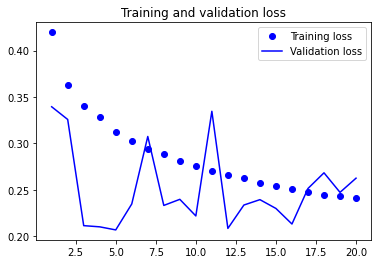

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

However, conv layers inspect patterns without knowing its location (at the beginning or end). This may make no sense for time sequences.

### 為耶拿數據集準備高解析率的資料產生器

In [59]:
step = 3  # 先前設定為 6(每小時 1 個時間點), 現在設定為 3(每 30 分鐘 1 個時間點)
lookback = 720
delay = 144
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128


### 結合 1D 卷積層和 GRU 層的模型

Use 1D convolutional layers to preprocess the data and feed to RNN. CNN plays a role in converting long sequences into shorter feature vectors. Then RNN takes these as its input. 

Now, we combine CNN with RNN: preprocess patterns quickly using CNN and learn patterns recursively using sensitive RNN.

In [62]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32,
                     #recurrent_dropout=0.5,
                     dropout=0.1))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_29 (GRU)                 (None, 32)                6240      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
